Analyse and visualise sentiment patterns in social media data to understand public openion and attitudes towards specific topics or brands.

In [38]:
pip install pandas scikit-learn matplotlib seaborn

In [39]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# Load the datasets
train_data = pd.read_csv("/content/twitter_training.csv", names=['ID', 'Brand', 'Sentiment', 'Text'])
valid_data = pd.read_csv("/content/twitter_validation.csv", names=['ID', 'Brand', 'Sentiment', 'Text'])

In [41]:
# Explore the data
print("Train data shape:", train_data.shape)
print("Validation data shape:", valid_data.shape)
print(train_data.head())

Train data shape: (74682, 4)
Validation data shape: (1000, 4)
     ID        Brand Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                Text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


In [42]:
# Handle missing values
train_data['Text'].fillna('', inplace=True)
valid_data['Text'].fillna('', inplace=True)

In [43]:
# Split data into features and labels
X_train = train_data['Text']
y_train = train_data['Sentiment']
X_valid = valid_data['Text']
y_valid = valid_data['Sentiment']

In [44]:
# Vectorize text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_valid_vec = vectorizer.transform(X_valid)

In [45]:
# Train a Linear SVM classifier
clf = LinearSVC()
clf.fit(X_train_vec, y_train)

LinearSVC()

In [46]:
# Evaluate the classifier
predictions = clf.predict(X_valid_vec)
print("Classification Report:")
print(classification_report(y_valid, predictions))

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.85      0.78      0.81       172
    Negative       0.83      0.91      0.87       266
     Neutral       0.88      0.78      0.83       285
    Positive       0.81      0.87      0.84       277

    accuracy                           0.84      1000
   macro avg       0.84      0.84      0.84      1000
weighted avg       0.84      0.84      0.84      1000



In [47]:
print("Confusion Matrix:")
print(confusion_matrix(y_valid, predictions))

Confusion Matrix:
[[134  12   7  19]
 [  5 242   8  11]
 [ 11  24 223  27]
 [  7  13  15 242]]


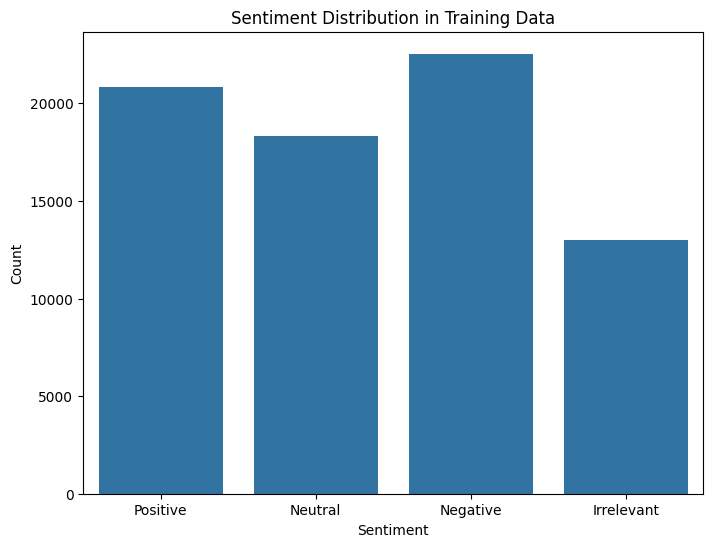

In [48]:
# Visualize sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=train_data)
plt.title('Sentiment Distribution in Training Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()